<a href="https://colab.research.google.com/github/IamBhanuYenumula/Byen_DataScience_expo/blob/main/LinearRegression_Assumptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assumption 1: Linearity - individual Scatter Plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [7]:
x = 7 * np.random.rand(100,1) -2.8
y = 7 * np.random.rand(100,1) -2.8

z = x**2 + y**2 + 0.2*x + 0.2 * y + 0.1*x*y +2 + np.random.randn(100,1)
df=pd.DataFrame()

df['x1'] = x.reshape(100)
df['x2'] = y.reshape(100)
df['y'] = z.reshape(100)

df

,x1,x2,y
0,2.887025,-2.615459,16.789532
1,3.789273,-0.745792,15.226934
2,0.979959,-2.686714,10.471836
3,-1.904443,-1.883413,7.701693
4,0.653267,3.335147,14.245633
...,...,...,...
95,4.071799,2.123352,24.662613
96,-1.265281,4.005910,19.195939
97,0.988247,2.300222,9.292663
98,1.438005,0.273101,5.376370


Text(0, 0.5, 'y')

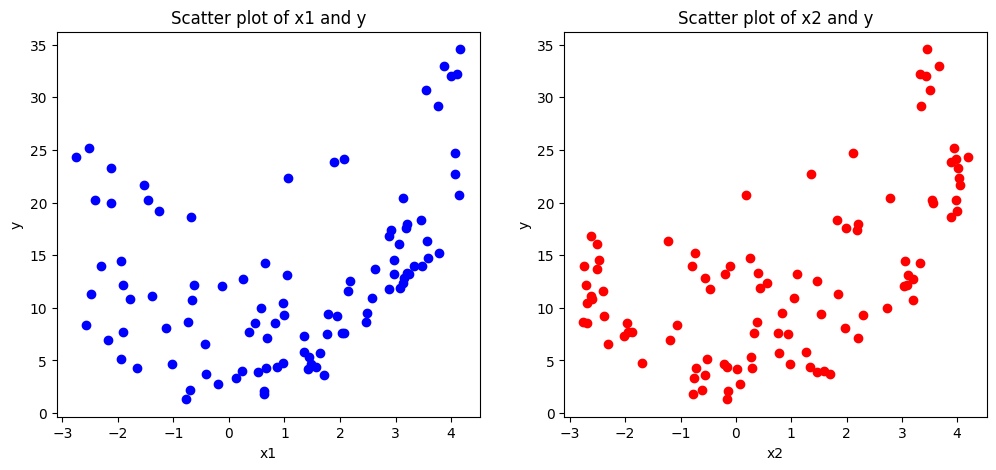

In [9]:
# create a new figure and define subplots
fig,(ax1,ax2) =  plt.subplots(1,2,figsize=(12,5))

# plot x1 and y
ax1.scatter(df['x1'],df['y'], color = 'blue')
ax1.set_title('Scatter plot of x1 and y')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')

#plot x2 and y
ax2.scatter(df['x2'],df['y'], color = 'red')
ax2.set_title('Scatter plot of x2 and y')
ax2.set_xlabel('x2')
ax2.set_ylabel('y')


Assumption1 Linearity: - Residual plot

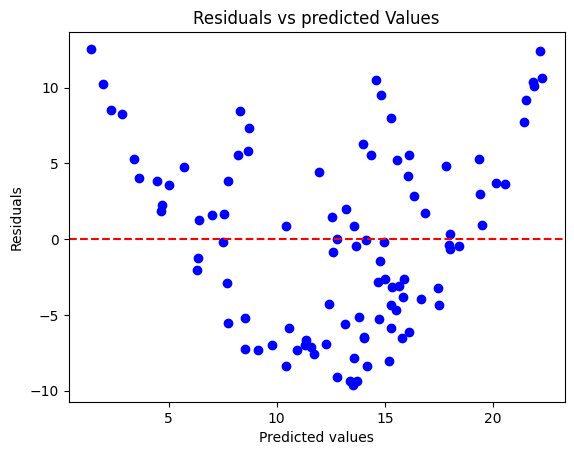

In [13]:
# fit a linear regression model
X = df[['x1','x2']]
y = df['y']

model = LinearRegression()
model.fit(X,y)

# Calculate predicted values and residuals
y_pred = model.predict(X)
residuals = y - y_pred

# Plot residuals against predicted values
plt.scatter(y_pred,residuals, color = 'blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs predicted Values')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

plt.show()

Assumption 1 Linearity: - Adding Polynomial Term

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# split dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Fit a regression model
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# Calculate metrics for linear model
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)

# Fit a polynomial model
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_y_pred = poly_model.predict(X_test_poly)

# Calculating metrics for polynomial model
poly_r2 = r2_score(y_test,poly_y_pred)
poly_mse = mean_squared_error(y_test,poly_y_pred)

# Compare model performance
print("Linear Regression")
print(f"R-squared: {r2:.4f}")
print(f"Mean_squared_error: {mse:.4f}")

print("\n Polynomial model Linear Regression")
print(f"R-squared: {poly_r2:.4f}")
print(f"Mean_squared_error: {poly_mse:.4f}")



Linear Regression
R-squared: -0.0546
Mean_squared_error: 38.0408

 Polynomial model Linear Regression
R-squared: 0.9762
Mean_squared_error: 0.8599


Assumption 1: Linearity - Applying Transformations

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [16]:
# Generate a non-linear dataset with a quadratic relationship
np.random.seed(42)
x = 10 * np.random.rand(100,1)
y = x**2 + 5 + np.random.normal(0,5,(100,1))
y = np.abs(y)



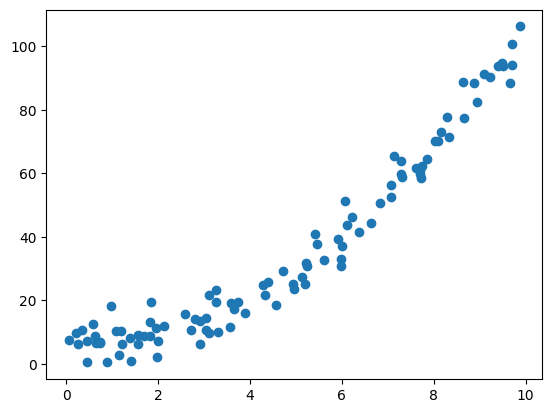

In [17]:

plt.scatter(x,y)

In [18]:
# Applying square root transfromation to y
y_sqrt = np.sqrt(y)


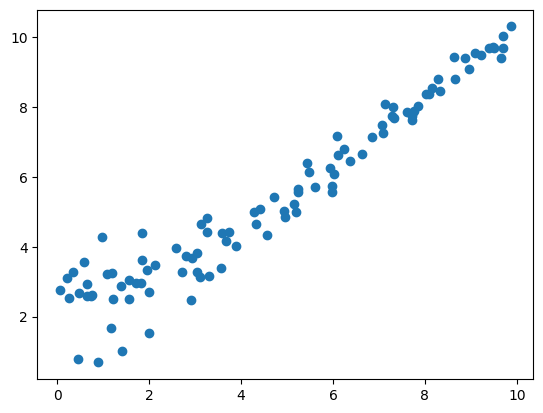

In [19]:
plt.scatter(x,y_sqrt)

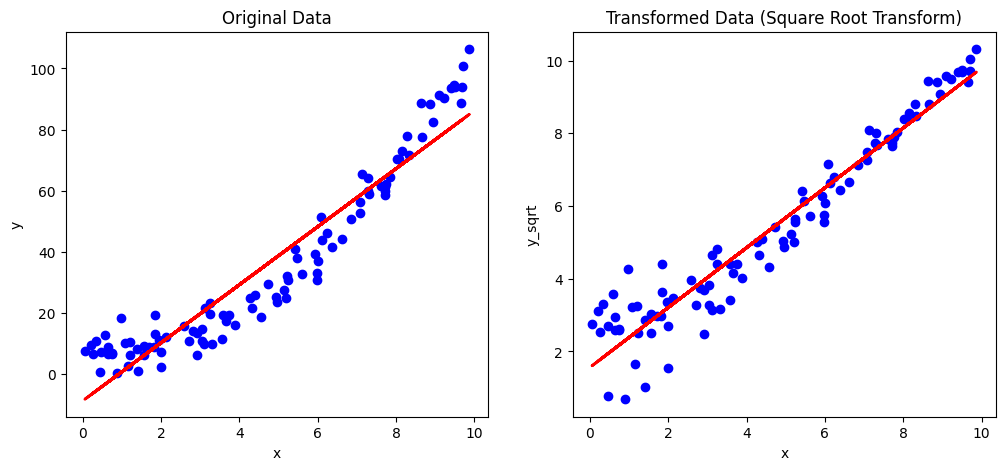

R - squared on original data: 0.90
Mean_squared_error on original data: 87.02
R - squared on transformed data: 0.93
Mean_squared_error on transformed data: 0.45


In [26]:
# Fit linear regression models for the original and transformed data

lr = LinearRegression()
lr.fit(x,y)
lr_transformed = LinearRegression()
lr_transformed.fit(x,y_sqrt)

# Predictions
y_pred = lr.predict(x)
y_pred_transformed = lr_transformed.predict(x)

# visualize the relationship between x and y before and after transformation
fig, (ax1, ax2)= plt.subplots(1,2,figsize=(12,5))
# before transformation
ax1.scatter(x,y, color='blue')
ax1.plot(x,y_pred, color = 'red', linewidth=2)
ax1.set_title('Original Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# After transformation
ax2.scatter(x,y_sqrt, color = 'blue')
ax2.plot(x,y_pred_transformed, color ='red', linewidth=2)
ax2.set_title('Transformed Data (Square Root Transform)')
ax2.set_xlabel('x')
ax2.set_ylabel('y_sqrt')

plt.show()

# Evaluation metrics
original_r2 = r2_score(y,y_pred)
original_mse = mean_squared_error(y,y_pred)
print(f"R - squared on original data: {original_r2:.2f}")
print(f"Mean_squared_error on original data: {original_mse:.2f}")

transformed_r2 = r2_score(y_sqrt,y_pred_transformed)
transformed_mse = mean_squared_error(y_sqrt,y_pred_transformed)
print(f"R - squared on transformed data: {transformed_r2:.2f}")
print(f"Mean_squared_error on transformed data: {transformed_mse:.2f}")



Assumption 1: Linearity - Applying Polynomial Regression

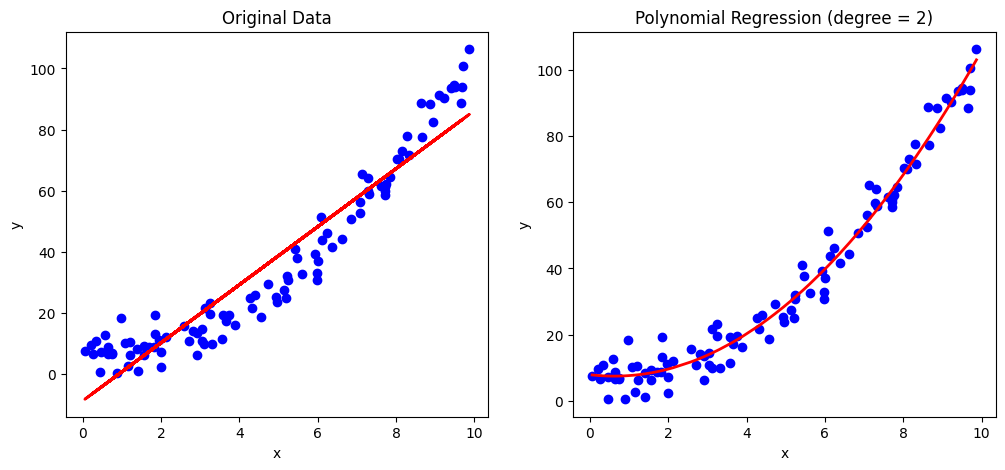

Linear Regression
R - squared on original data: 0.90
Polynomial Regression
R - squared on transformed data: 0.98


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

# generating a non-linear dataset
np.random.seed(42)
x = 10*np.random.rand(100,1)
y = x**2 + 5 + np.random.normal(0,5,(100,1))
y = np.abs(y)

# Fit linear regression model
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

# Fit polynomial regression model (degree = 2)
poly_features = PolynomialFeatures(degree=2,include_bias=False)
x_poly = poly_features.fit_transform(x)
poly_model = LinearRegression()
poly_model.fit(x_poly,y)
y_pred_poly = poly_model.predict(x_poly)

# Visualize the fitted lines for linear and polynomial regression
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))

# Linear regression
ax1.scatter(x,y,color = 'blue')
ax1.plot(x,y_pred, color = 'red', linewidth = 2)
ax1.set_title('Original Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Polynomial regression
ax2.scatter(x,y, color = 'blue')
ax2.plot(sorted(x[:,0]),y_pred_poly[np.argsort(x[:,0])], color= 'red', linewidth =2)
ax2.set_title('Polynomial Regression (degree = 2)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.show()

# calculating r2 score

r2 = r2_score(y,y_pred)
r2_poly = r2_score(y,y_pred_poly)

print("Linear Regression")
print(f"R - squared on original data: {r2:.2f}")
print("Polynomial Regression")
print(f"R - squared on transformed data: {r2_poly:.2f}")

#### Normality of Residuals

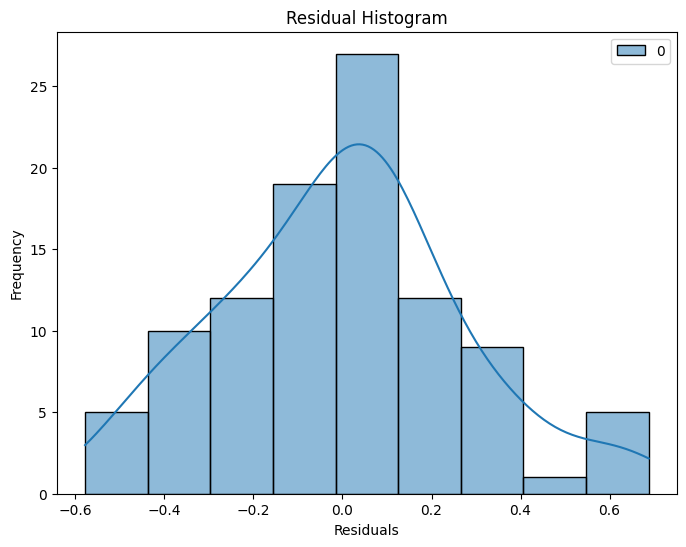

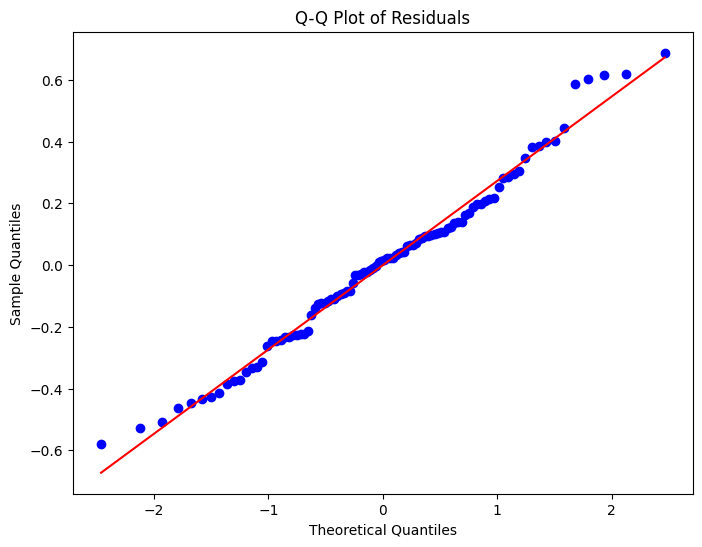

Mean of residuals: 0.00
Skewness: 0.22
Kurtosis: -0.07
Ominbus test statistic: 0.90
Ominbus test p-value: 0.64


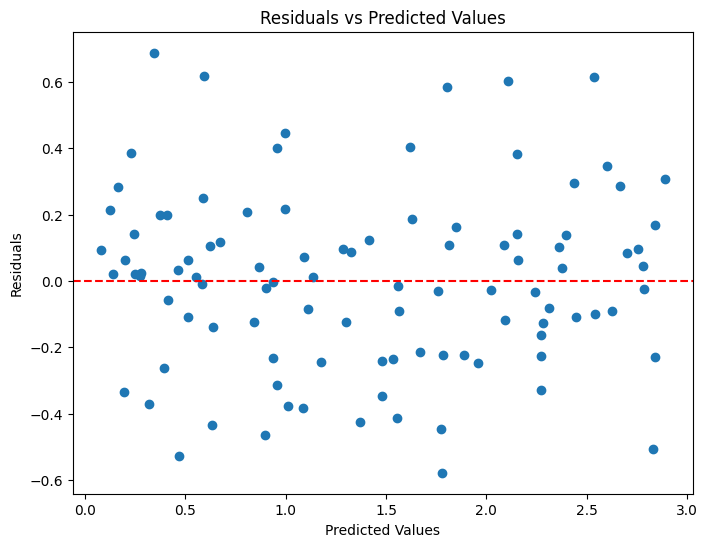

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

# generate a synthetic dataset
np.random.seed(42)
x = np.random.rand(100,1)
y = 3 * x + np.random.normal(0,0.3,(100,1))

# fit a linear regression

lr=LinearRegression()
lr.fit(x,y)
y_pred=lr.predict(x)

# calculate the residual (error term)
residuals = y - y_pred

# Histogram
plt.figure(figsize=(8,6))
sns.histplot(residuals,kde = True)
plt.title('Residual Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


# Q-Q plot
from scipy import stats
plt.figure(figsize=(8,6))
stats.probplot(residuals.flatten(), plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel("Theoretical Quantiles")
plt.ylabel('Sample Quantiles')
plt.show()

# check mean
mean_residuals = np.mean(residuals)
print(f'Mean of residuals: {mean_residuals:.2f}')

# calculate skewness, kurtosis, Omnibus test statistic and p-value
skewness = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)
omnibus_stat, omnibus_p_value = stats.normaltest(residuals)

print(f'Skewness: {skewness[0]:.2f}')
print(f'Kurtosis: {kurtosis[0]:.2f}')
print(f'Ominbus test statistic: {omnibus_stat[0]:.2f}')
print(f'Ominbus test p-value: {omnibus_p_value[0]:.2f}')

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0,color='r',linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Example of non normality of resiudals

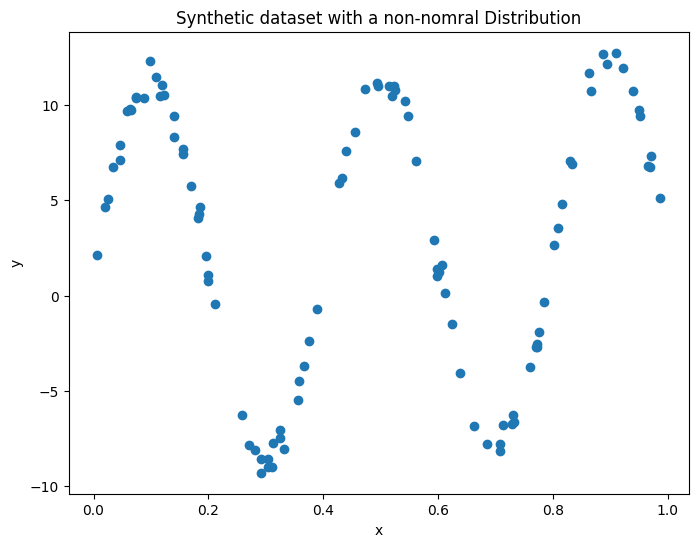

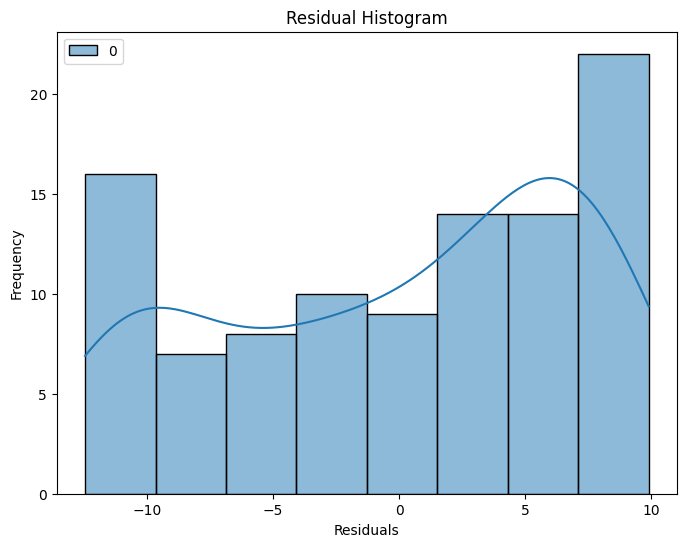

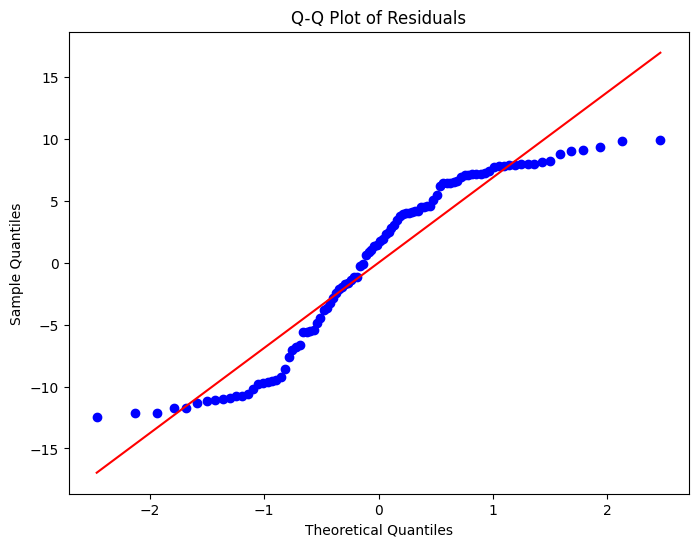

Mean of residuals: -0.00
Skewness: -0.37
Kurtosis: -1.27
Ominbus test statistic: 50.62
Ominbus test p-value: 0.00


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.rand(100,1)
y = np.exp(x) + 10*np.sin(5*np.pi*x) + np.random.normal(0,0.5,(100,1))

# viusalize the dataset
plt.figure(figsize=(8,6))
plt.scatter(x,y)
plt.title('Synthetic dataset with a non-nomral Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# fit a linear regression

lr=LinearRegression()
lr.fit(x,y)
y_pred=lr.predict(x)

# calculate the residual (error term)
residuals = y - y_pred

# Histogram
plt.figure(figsize=(8,6))
sns.histplot(residuals,kde = True)
plt.title('Residual Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


# Q-Q plot
from scipy import stats
plt.figure(figsize=(8,6))
stats.probplot(residuals.flatten(), plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel("Theoretical Quantiles")
plt.ylabel('Sample Quantiles')
plt.show()

# check mean
mean_residuals = np.mean(residuals)
print(f'Mean of residuals: {mean_residuals:.2f}')

# calculate skewness, kurtosis, Omnibus test statistic and p-value
skewness = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)
omnibus_stat, omnibus_p_value = stats.normaltest(residuals)

print(f'Skewness: {skewness[0]:.2f}')
print(f'Kurtosis: {kurtosis[0]:.2f}')
print(f'Ominbus test statistic: {omnibus_stat[0]:.2f}')
print(f'Ominbus test p-value: {omnibus_p_value[0]:.2f}')